In [1]:
import os
import sys

import pydicom
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
!mkdir ./dcm_scratch
!cp /mnt/disks/data/raw/mris/liver/1098695_20203_2_0.zip ./dcm_scratch/
!unzip ./dcm_scratch/1098695_20203_2_0.zip -d ./dcm_scratch/

mkdir: cannot create directory './dcm_scratch': File exists
Archive:  ./dcm_scratch/1098695_20203_2_0.zip
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253358943038549.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253356718138530.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253357913838542.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253356361638527.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253356737238531.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253357931238543.dcm  
  inflating: ./dcm_scratch/manifest.csv  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253357530238539.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253358920938548.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.2015062314253360657938554.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.41754.201506231425336031243855

In [22]:
dcm_dir = './dcm_scratch/'
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    print(dcm)
    break

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'P', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '20150623'
(0008, 0013) Instance Creation Time              TM: '142533.880000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.2.18.41754.2015062314253357913838542
(0008, 0020) Study Date                          DA: '20150623'
(0008, 0021) Series Date                         DA: '20150623'
(0008, 0022) Acquisition Date                    DA: '20150623'
(0008, 0023) Content Date                        DA: '20150623'
(0008, 0030) Study Time                          TM: '141620.468000'
(0008, 0031) Series Time                         TM: '142533.861000'
(0008, 0032) Acquisition Time                    TM: '142524.692500'
(0008, 0033) Content Time                        TM: '142533.880000'
(0

Series: gre_mullti_echo_10_te_liver Instance number: 6, big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 4, big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 5, big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 1, big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 8, big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 3, big pix:352
Series: gre_mullti_echo_10_te_liver Instance number: 8, big pix:297
Series: gre_mullti_echo_10_te_liver Instance number: 7, big pix:307
Series: gre_mullti_echo_10_te_liver Instance number: 5, big pix:321
Series: gre_mullti_echo_10_te_liver Instance number: 1, big pix:501
Series: gre_mullti_echo_10_te_liver Instance number: 9, big pix:4095
Series: gre_mullti_echo_10_te_liver Instance number: 9, big pix:248
Series: gre_mullti_echo_10_te_liver Instance number: 6, big pix:280
Series: gre_mullti_echo_10_te_liver Instance number: 10, big pix:4095
Series: gre_mullti_echo_10_te_liver Inst

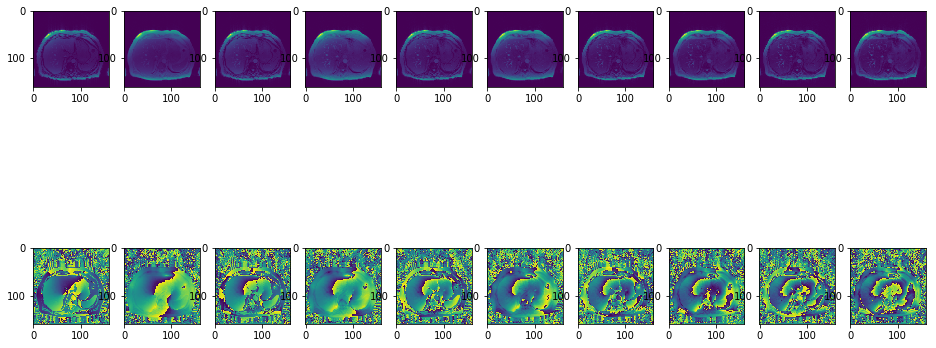

In [23]:
_, axes = plt.subplots(2, 10, figsize=(16, 8))
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    row = 0
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    print(f"Series: {dcm.SeriesDescription.lower()} Instance number: {dcm.InstanceNumber}, big pix:{dcm.LargestImagePixelValue}")
    if dcm.LargestImagePixelValue > 1024:
        row = 1    
    axes[row, dcm.InstanceNumber-1].imshow(dcm.pixel_array)